In [ ]:
# Imports
import pandas as pd
#regex - text processing
import re
import nltk
# Import numpy
import numpy as np
from pandas import DataFrame
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.stem import PorterStemmer
import string
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWiojuzqIykaGYMzl6VovDw-buBxz9KwyiQkx5s-nM1SuCbT0cRGe6A
Mounted at /content/drive


In [ ]:
# mount my drive

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Word2Vec items
from gensim.test.utils import common_texts
from gensim.models import Word2Vec, KeyedVectors
# Define stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{'his', 've', 'do', 'some', 'than', "you'd", 'it', 'our', 'y', 'is', 'into', 'such', "haven't", 'further', 'down', 'so', "wasn't", 'they', 'once', 'will', 'them', 'this', 'all', "didn't", 'doing', 'ourselves', 'ours', 'which', 'be', 'my', 'where', 'had', 'below', "shouldn't", "she's", 'no', 'how', 'its', 'ma', 'theirs', 'nor', "doesn't", 'have', 're', 'being', 'about', 'mustn', 'too', 'off', 'whom', 'each', 'me', 'own', "don't", 'yourself', 't', 'here', "mightn't", 'against', 'shan', "you're", 'in', "that'll", 'that', 'if', "couldn't", 'your', 'who', 'only', 'wouldn', 'both', 'her', 'with', "wouldn't", 'through', 'yours', 'don', 'has', 'ain', 'haven', 'by', 'wasn', 'between', 'what', 'mightn', 'himself', 'd', "shan't", 'didn', 'their', 'i', "hasn't", 'was', 'been', 'any', 'did', 'before', 'not', 'weren', 'couldn', 'these', 'most', 'as', 'those', 'the', 'itself', 'a', "weren't", 'when', 'there', 'can', 'isn', "should've", 'yourselves', 'and', 'over', 'won', 'other', "mustn't", 'up', 'un

In [ ]:
filepath = '/content/drive/MyDrive/Fi-datasets/o7/annotations.csv'

In [ ]:
# Declare dataframe
df = pd.read_csv(filepath)

# Data Cleaning

In [ ]:
# Remove emojis funct
def remove_emoji(string):
  emoji_pattern = re.compile("["u"\U0001F600-\U0001F64F" # emoticons 
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', string)

In [ ]:
# preprocessing tweets

def preprocess_tweet_text(tweet):
  #lowercase each letter
  newTweet = tweet.lower()

  #remove urls, hashtags, mentions
  newTweet = re.sub('http[s]?://(?:[a-zA-Z0-9$-_@.&\+!*\(\),%])+', '', newTweet, flags= re.MULTILINE)
  newTweet = re.sub('@[a-zA-Z0-9_]+','', newTweet)
  newTweet = re.sub("#([a-zA-Z0-9_]{1,50})",'', newTweet)

  #remove punctuation
  newTweet = newTweet.translate(str.maketrans('', '', string.punctuation))
  #remove
  newTweet = remove_emoji(newTweet)

  #remove stopwords
  tweet_tokens = word_tokenize(newTweet)
  filtered_text = [w for w in tweet_tokens if not w in stop_words]

  # #stem words
  # ps = PorterStemmer()
  # stem_text = [ps.stem(w) for w in filtered_text]

  return filtered_text

In [ ]:
df_pp = df
df_pp['Text'] = df_pp['Text'].apply(preprocess_tweet_text)
print(df_pp.head(10))

                                                Text                 Label
0  [fucking, piece, shit, whole, community, solel...                  Hate
1  [’, funny, china, iran, italy, ’, pretty, rand...               Neutral
2  [got, victoria, line, today, seven, sisters, c...                  Hate
3  [appalling, media, amp, libtards, bitch, virus...                  Hate
4  [dude, fuck, chinese, man, fuck, em, think, ’,...                  Hate
5  [dear, could, please, kindly, turn, moderation...               Neutral
6  [much, chinese, virusyo, ass, sponsored, fucki...               Neutral
7  [like, media, blowing, terms, “, chinese, viru...  Non-Asian Aggression
8  [cant, blame, donald, trump, virus, spreading,...                  Hate
9  [fuck, china, chinese, virus, rest, peace, pic...                  Hate


# Train and Test

In [ ]:
# Access Word2Vec model from gGoogle

model = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Fi-datasets/o7/GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
def sent_vectorizer(sent, model):
    sent_vec = np.zeros(300)
    numw = 0
    for w in sent:
        try:
            sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
    return sent_vec / np.sqrt(sent_vec.dot(sent_vec))

In [ ]:
vecfinal = []
for tweet in df['Text']:
    vecfinal.append(sent_vectorizer(tweet, model))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
df_w2v = DataFrame(vecfinal)

In [ ]:
df_w2v_comb = df_w2v

In [ ]:
df_w2v = df_w2v.dropna()

#Hashtag Features

In [ ]:
#hashtag features
hash_Tag_List = ['#RacismIsAVirus','#StopAsianHate','#StopAAPIHate','#IAmNotAVirus','#RascismIsAVirus','#TheyCantBurnUsAll','#WashTheHate','#AsianAmerican','#AAPI','#RejectRacism','#NoToXenophobia','#NoToRacism','#Covid19Racism','#CoronavirusRacism', '#', '#1984', '#1U', '#2', '#2019nCoV', '#401k', '#45sFakeEconomy', '#5DemandsNot1Less', '#5G', '#721YuenLong', '#7UMMIT', '#9News', '#AACCstatement', '#aaccstatement', '#AAPI', '#ABioWeaponsLab', '#ActToChange', '#ad', '#adopt', '#Africa', '#AfricansAreNotLabRats', '#africaswine', '#AI', '#airborne', '#aircrafts', '#airports', '#alllivesmatted', '#ally', '#Amazon', '#amazon', '#America', '#America2020', '#AmericaFirst', '#AmericaNeedsToWork', '#Americans', '#AmericansFirst', '#anc', '#andyouthoughtyourhotelwasbad', '#animalsex', '#anime', '#anonymously', '#antiAsian', '#antiasianracism', '#AntiAsianRacism', '#antiAsianracism', '#antiChineseracism', '#AntiCoronaVirusFund', '#antiracism', '#AnywherebutChina', '#API', '#Asia', '#Asian', '#asian', '#AsianAintAllChinese', '#AsianAmerican', '#asianamericanpodcast', '#asianamericans', '#AsianAmericans', '#asianbigtits', '#AsianStruggles', '#asiansunite', '#AsianTwitter', '#auspol', '#AuspolSoCorrupt', '#Australia', '#australiafirst', '#Australian', '#BanChina', '#BanChineseWetMarkets', '#BayArea', '#bbcaq', '#Beardstyles', '#becool2asians', '#BeCool2Asians', '#Becool2Asians', '#Beijing', '#BeingAMuslimInIndia', '#Bernie', '#BERNIEISACOMMIE', '#Biblical', '#BigGovVirus', '#Bigotry', '#bigotryisugly', '#BigPharma', '#BillGates', '#BillGatesVirus', '#BioWeapon', '#Bioweapon', '#bioweapon', '#BIOWeapon', '#bioweaponcovid19', '#Bioweapons', '#bisexualwomen', '#blackandwhite', '#blackplague', '#BlackTwitter', '#BlackWidow', '#BladeRunner', '#Blockade', '#blockchain', '#BoicoteAChina', '#bombChina', '#boogaloo', '#border', '#bouncingtits', '#boycott', '#boycottamazon', '#BoycottChina', '#Boycottchina', '#boycottryanair', '#Brazil', '#bre', '#breaking', '#BREAKING', '#BreakingNews', '#breakingnews', '#BringKenyansInChinaHome', '#Brooklyn', '#BruceAylward', '#Bumbledick', '#Business', '#businesses', '#c2c', '#cadres', '#California', '#CANADA', '#Canada', '#CanaryIslands', '#CancelEverything', '#CandiceIyog', '#CaptainTrips', '#carnival', '#CaroleKilledHerHusband', '#caronavirus', '#CathayPacific', '#cats', '#ccp', '#CCP', '#CCPChina', '#CCPLiedPeopleDied', '#CCPVIRUS', '#ccpvirus', '#CCPvirus', '#CCPVirus', '#CDC', '#CDCgov', '#CDCTRAVELNOTICE', '#cdnpoli', '#CebuPacific', '#celebs', '#celebsnobs', '#Censorship', '#Centennial', '#Charlotte', '#Chernobyl', '#chickenflu', '#ChiCom', '#chicomvirus', '#China', '#china', '#CHINA', '#ChinaAgainstHumanity', '#chinacanhelpus', '#ChinaCoronaVirus', '#chinaflu', '#ChinaFlu', '#ChinaGovernment', '#ChinaIsAsshoe', '#ChinaIsLying', '#ChinaLiedAndPeopleDied', '#ChinaLiedHDExperienceDied', '#ChinaLiedPeopleDie', '#ChinaLiedPeopleDied', '#ChinaLies', '#ChinaLiesPeopleDie', '#chinaman', '#ChinaMustExplain', '#ChinaMustPay', '#Chinato1970', '#Chinatown', '#chinauprising', '#ChinaVIRUS', '#chinavirus', '#ChinaVirus', '#CHINAVIRUS', '#Chinavirus', '#chinaVirus', '#ChinaVirus19', '#ChinaVirusHide', '#chinaVirusMadeInChina', '#ChinaVirusSesungguhnya', '#ChinaWuhanVirus', '#chinazi', '#Chinazi', '#ChinaziVirus', '#Chine', '#chinese', '#CHINESE', '#Chinese', '#ChineseAmericans', '#ChineseAreNotAvirus', '#ChineseAreNotAVirus', '#ChineseBioterrorism', '#ChineseBitch', '#ChineseCommunistParty', '#ChineseCoronaVirus', '#ChineseCoronavirus', '#ChineseCrested', '#chinesefood', '#ChineseFood', '#ChineseStudents', '#ChineseTourists', '#ChineseViralInstrument', '#ChineseVirus', '#chinesevirus', '#CHINESEVIRUS', '#ChineseVirus19', '#ChineseVirusCorona', '#ChineseWuhanVirus', '#chinesvirus', '#chink', '#ChinkVirus', '#Chinky', '#CHO', '#ChrisHayes', '#ChristianMissionaries', '#Cina', '#CinaCoronavirus', '#CinaVirus', '#climatesecurity', '#Clinton', '#CNN', '#CNNiSAssHoe', '#ColonaVirus', '#CommieComrades', '#CommieCrats', '#Commies', '#CommunismKills', '#CommunistVirus', '#comscore', '#concentrationcamps', '#Const', '#coranavirusitalia', '#CornavirusOutbreak', '#corona', '#Corona', '#CoronaAlert', '#coronachan', '#CoronaCrisis', '#CoronaInPakistan', '#CoronaJihaad', '#CoronaJihad', '#CoronaJihadis', '#Coronakrise', '#CoronaLockdown', '#coronamemes', '#CoronaOutbreak', '#coronaoutbreak', '#Coronaphobia', '#coronaracism', '#CoronaRacism', '#CoronaRevolution', '#CoronarvirusOutbreak', '#CoronaUpdate', '#coronavavirus', '#Coronavid19', '#Coronavirius', '#coronavirues', '#CoronaVirus', '#CoronaVIRUS', '#CORONAVIRUS', '#Coronavirus', '#coronavirus', '#coronavirusaustralia', '#CoronaVirusChallenge', '#coronavirusChina', '#CoronavirusChina', '#coronaviruschina', '#CoronavirusCoverup', '#coronavirusindia', '#coronavirusIran', '#coronavirusItaly', '#coronavirusjapan', '#coronavirusJapan', '#coronaviruskenya', '#Coronavirusmiddleeast', '#coronavirusny', '#CoronavirusOman', '#CoronaVirusOutbreak', '#CoronavirusOutbreak', '#coronavirusoutbreak', '#Coronaviruspakistan', '#CoronavirusPandemic', '#coronavirusracism', '#coronavirussingapore', '#coronavirusSouthKorea', '#coronavirustruth', '#Coronavirustruth', '#CoronavirusUAE', '#coronavirusuk', '#coronavirusupdate', '#CoronaVirusUpdate', '#CoronaVirusUpdates', '#CoronavirusUpdates', '#coronavirusus', '#coronavirususa', '#coronavirusUSA', '#CoronavirusUSA', '#coronavirusWHO', '#CoronavirusWho', '#coronaviruswuhan', '#coronoavirus', '#coronoavirusoutbreak', '#corononavirus', '#corornavirus', '#corruptiontrials', '#Corvid19', '#CoughingWhileAsian', '#COVD19', '#covid', '#Covid', '#COVID', '#CoVid19', '#covid19', '#COVID19', '#Covid19', '#covid19italy', '#COVID19Pandemic', '#COVID19spain', '#Covid19UAE', '#covid19UK', '#COVID19US', '#Covid19usa', '#COVID2019', '#COVIDConvos', '#covidracism', '#covivd19', '#CrimesAgainstAsians', '#Criticism', '#Cunts', '#cutiepie', '#Czech', '#Daegu', '#Davao', '#deathbydesign', '#deathtoprc', '#decouplechina', '#DeepStateCabal', '#Delhigenocide', '#DelhiRiots', '#DelhiRiots2020', '#DemDebate', '#democracyforchina', '#democrats', '#DemocratsAreDestroyingAmerica', '#DemocratsHateAmerica', '#DemocratsLiedPeopleDied', '#Demonetized', '#depopulation', '#Detroit', '#DiamondPrincess', '#disbandWHO', '#Disease', '#diseasedpeople', '#disinfection', '#disobedientdss', '#DNA', '#Dobbs', '#DogWhistles', '#DonaldTrump', '#DonaldTrumpCoronavirus', '#DontBeAnAsshole', '#dontbearacist', '#dontgetthehump', '#DowJones', '#downwiththeccp', '#DroneSurveillance', '#DumpTrump2020', '#Duterte', '#EastTurkistan', '#Ebola', '#Economy', '#edchat', '#Election2020', '#Elk', '#embodiedsolidarity', '#EMPReady', '#EndRacism', '#EnemyOfThePeople', '#Epidemic', '#epidemic', '#epidemics', '#espionage', '#Estrogeneration', '#ethnicidentityjourney', '#ethnophobia', '#evilonearth', '#exclusion', '#excuses', '#Execute', '#ExposeHim', '#EyeDropNews', '#FaceApp', '#FactsNotFear', '#FAIL', '#FakeNews', '#fakenews', '#FakeNewsMedia', '#FalseFlag', '#Falseflag', '#FangBin', '#FatTuesday', '#Fauci', '#FBR', '#FeministAsianDad', '#fentanyl', '#fightCoronavirus', '#FightForFreedomStandWithHongKong', '#FightRacism', '#fightvirusnotpeople', '#FilmYourHospital', '#filmyourtown', '#filthy', '#Finance', '#findyourthing', '#flattenthecurve', '#FlattenTheCurve', '#flm', '#flu', '#FluSeason', '#ForaFlay', '#foster', '#FoxNews', '#France', '#FreeChina', '#freedom', '#Freedom2TheWorld', '#FreeHK', '#FreePress', '#FreeTibet', '#FreeUyghur', '#French', '#fromchinawithlove', '#frontlineworkers', '#FU', '#FUBS', '#FUCK', '#FuckCCP', '#fuckccp', '#fuckChina', '#fuckchina', '#FuckChina', '#FUCKING', '#FucktheCCP', '#FuckWHO', '#fuckyouchina', '#fukchina', '#FunFact', '#FvckChina', '#GameOver', '#GeorgeSoros', '#German', '#Germany', '#girlnextdoor', '#Global', '#Google', '#GOP', '#GOPBetrayedAmerica', '#GOPCoverup', '#GOPracism', '#government', '#Government', '#Govtbioweapons', '#Grand', '#greedkills', '#Guangzhou', '#H1N1', '#hack', '#hamantaschen', '#Hampton', '#handbags', '#hatecrime', '#HateCrime', '#Hateisavirus', '#HateIsAVirus', '#HateisaVirus', '#hateisavirus', '#HATEISAVIRUS', '#HateSpeech', '#Hawaii', '#Health', '#HealthAuthorities', '#HHS', '#Hindus', '#History', '#HKPoliceBrutality', '#HKPoliceTerrorists', '#hoax', '#HoldChinaAccountable', '#Hollywood', '#HollywoodLiedPeopleDied', '#hongkong', '#HongKong', '#HongKongers', '#HongKongisnotChina', '#HongKongPolice', '#HongKongProtests', '#hotels', '#Huawei', '#Hubei', '#HugAChinese', '#hugachinese', '#HugaChinese', '#human', '#Hydroxycloroquine', '#Hypocrites', '#IAmChina', '#Iamnotavirus', '#IAmNotaVirus', '#iamnotavirus', '#IamNotAVirus', '#IAMNOTAVIRUS', '#IamNotaVirus', '#IamNOTaVirus', '#IAmNotAVirus', '#IAmNotCOVID19', '#IAmNotCovid19', '#IamNotEvenChinese', '#ichbinkeinVirus', '#ichbinkeinvirus', '#ID2020', '#idiotchink', '#IDTwitter', '#IfImMadItsBecause', '#ignorant', '#ikbengeenvirus', '#imnotavirus', '#Impeachment', '#impeachment', '#IMPEACHMENT', '#ImpeachTrumpAgain', '#IMPOTUSthe3RD', '#IMProud', '#IndiaAgainstCAA', '#IndiaFightsCorona', '#infected', '#inflight', '#interbredspastics', '#iran', '#Iran', '#iranwar', '#irony', '#Irvine', '#IStandWithHongKong', '#italy', '#Italy', '#ItalyCoronavirus', '#italylockdown', '#itsanhonorjusttobeasian', '#ItsGoingToBeBiblical', '#japan', '#Japan', '#JaredKushnerForPrison', '#JeffBezos', '#JeNeSuisPasUnVirus', '#jesuispasunvirus', '#Jewish', '#JindalStainless', '#JKIA', '#justforyou', '#k12', '#KAG', '#KAG2020', '#KarmaVirus', '#KeepMeSafe', '#kenya', '#Kirkland', '#KitaJagaKita', '#korea', '#Korea', '#Korean', '#Koreancoronavrius', '#KungFlu', '#kungflu', '#KungFluFighting', '#KungFluVirus', '#labs', '#LayNewCharitySong', '#Lebanon', '#leftists', '#LGBT', '#LGBTQ', '#LiberalismIsABrainEatingVirus', '#liberals', '#Libertad', '#licking', '#livestream', '#lockdown', '#Lockdown', '#LocustInvasion', '#lol', '#loosewomen', '#LosAngeles', '#lovegirls', '#LoveMyAsianPeeps', '#LoveNotHate', '#Lysol', '#madeinchina', '#MadeInChinaVirus', '#MAGA', '#MAGA2020', '#MAGATS', '#MAGAts', '#Maine', '#MainlandChinese', '#MakeAmericaSmartAgain', '#makechinapay', '#MakeChinaPay', '#MANILA', '#markets', '#MartialLaw', '#martiallaw', '#maturemilf', '#Media', '#MedicalMartialLaw', '#MedTwitter', '#memes', '#MEMES', '#MERS', '#MexicanHairless', '#MigratoryNotes', '#minorities', '#ModiConvertedIOKtoHell', '#Mont', '#montreal', '#MoonJaein', '#MotoGP', '#MSMLiedPeopleDied', '#MSNBCiSAssHoe', '#Mulan', '#Mumbai', '#MurderousGovernments', '#Muslim', '#muslims', '#MuslimTwitter', '#MustWatch', '#myths', '#nakedteens', '#nameit', '#NancyLiedPeopleDied', '#nCoV', '#nCoV19', '#nCoV2019', '#NCVFacts', '#Netherlands', '#NeverForgetNeverForgive', '#NewReality', '#news', '#NEWS', '#News', '#NewYork', '#nigeria', '#NIH', '#NizamuddinIdiots', '#NoChinaInfuenceOnAmerica', '#noclue', '#NoMoreAntiAsianRacism', '#NoNoBillyHo', '#NoPlaceForHate', '#Norman', '#NoSoyUnVirus', '#NotAChineseVirus', '#notchinesevirus', '#notmypresident', '#notoracism', '#Notoracism', '#NotThisGuy', '#NoVote4Terrorists', '#NoXenophobia', '#nucleardeal', '#nudemodel', '#nukechina', '#Nukes', '#NVCaucus', '#NYC', '#oldertube', '#onemediatruth', '#onlineteaching', '#Oops', '#OOTD', '#OpenAccess', '#OpenData', '#OpenScience', '#Orwellian', '#outbreak', '#outbreak2020', '#Pakistan', '#PakistanRetaliationDay', '#Pandemic', '#pandemic', '#PandemicCovid19', '#PANDEMICPatty', '#passenger', '#patents', '#Patriots', '#PatriotsAwakened', '#Pencedemic', '#perkytits', '#pharmagreed', '#phenomenallyasian', '#philadelphia', '#Philippine', '#Philippines', '#Philly', '#pigs', '#Plague', '#plandemic', '#PleaseShare', '#PLEDGE', '#Pndahugger', '#podcast', '#politics', '#PrayForChina', '#prepper', '#PrimaryCare', '#progressive', '#PROPAGANDA', '#PublicHealth', '#Purim', '#pussy', '#Q', '#Qom', '#Quarantine', '#QuarantineLife', '#QuaratineLife', '#quebec', '#racism', '#Racism', '#RACISMISAVIRUS', '#RacismIsAVirus', '#RacismisaVirus', '#racismisavirus', '#RacismIsContagious', '#RacismoNao', '#RacismStillAlive', '#racist', '#Racist', '#RacistInChief', '#RacistRice', '#redbubble', '#regionetoscana', '#Register', '#representationmatters', '#Republicans', '#RichardWhitley', '#riseabovehate', '#Riverside', '#Robots', '#RushLimbaugh', '#SA', '#Sanctioned', '#SanctuaryCities', '#sars', '#sars2019', '#SARSCoV2', '#sarscov2', '#SaturdayMorning', '#SaveChinatown', '#SaveUSA', '#SayNoToRacism', '#sc', '#SchiffForBrains', '#SchiffLiedPeopleDied', '#Science', '#sciencenotscaretactics', '#SecularVirus', '#senate', '#sexyaf', '#SFSU', '#ShameChina', '#ShameonChina', '#Shanghai', '#ShoppingAgainstPrejudice', '#ShowSomeSpine', '#SidharthShukIaFever', '#Sidhearts', '#SidNaazShowInDemand', '#Sinophobia', '#SmartNews', '#SocialDistanacing', '#socialists', '#SocialJusticeDay', '#SokoNews', '#soldoutUN', '#Soleimani', '#solidarity', '#somedayisherepodcast', '#Soros', '#sos', '#SOTSwamp', '#South', '#SouthKorea', '#Spain', '#SpeakerPelosiSUCKS', '#spreadfactsnotfear', '#SSayNo2Ducks', '#St', '#StandingWithTedros', '#StandUp4HumanRights', '#standwithchina', '#StandWithHongKong', '#StayAtHome', '#Staytogether', '#Sterling', '#SteveBannon', '#STFU', '#STOP', '#StopAAPIHate', '#stopaapihate', '#stopAAPIhate', '#StopCoronaRacism', '#StopRacism', '#StopSellingUsOutToChina', '#StopTERRORISTChina', '#StopTheHate', '#stopthehate', '#StopTheMadness', '#stopthenonse', '#StrongerTogether', '#SuperSpreader', '#TablighiJamaat', '#TablighiJamatVirus', '#TaherShah', '#taiwan', '#Taiwan', '#TaiwanCanHelp', '#Taiwanhelps', '#TaiwanIsHelping', '#TaiwanIsNotChina', '#TaiwanisnotChina', '#TakeOvers', '#tbt', '#tcot', '#Tech', '#TechNews', '#TedrosToTheHague', '#tehran', '#Tehran', '#Terrorist', '#Texas', '#THANKSCHINA', '#TheChineseFlu2020', '#TheDepartmentofTourism', '#TheDestinyOfLife', '#TheMoreYouKnow', '#ThesePeopleAreSick', '#TheSpanishFlu1918', '#TheStand', '#TheStorm', '#TheStory', '#ThingsThatArentTheGovtsResponsiblity', '#thoughts', '#ThrowTheStoneAndHideYourHand', '#THUGS', '#ThursdayMotivation', '#tibet', '#Tigertail', '#tinytits', '#tmz', '#To', '#TomCotton', '#TomHanks', '#Transnational', '#Travel', '#TravelBan', '#trump', '#Trump', '#TRUMP', '#Trump2020', '#Trump2020Landslide', '#Trump2020LandslideVictory', '#Trump2020NowMoreThanEver', '#TrumpDeflection', '#Trumpdemic', '#TrumpIsAnAsshole', '#TrumpLiedPeopleDied', '#TrumpTrain', '#TrumpUSA', '#TrumpVirus', '#tsa', '#tsp', '#TuckerCarlson', '#TuesdayThoughts', '#tupaki', '#TwitterKingSid', '#TwitterKurds', '#uighurmuslims', '#Uighurs', '#UK', '#UN', '#UNHRC', '#UnitedNations', '#unsc', '#UPDATE', '#UPS', '#US', '#USA', '#uscoronavirus', '#USSoil', '#UtahWashTheHate', '#Uyghur', '#Uyghurs', '#vaccine', '#Vaccine', '#Vaccines', '#VaxxOFF', '#vegetarian', '#Vietnam', '#viral', '#virology', '#Virus', '#virus', '#VirusChina', '#VirusCorona', '#VirusesDontDiscriminate', '#virusoutbreak', '#VitaminC', '#vlie', '#VoteBlue2020', '#VoteBlueNoMatterWho', '#VoteDemsOut2020', '#Waco', '#WalkAway', '#wall', '#WarRoomPandemic', '#Washington', '#Washthehate', '#WashTheHate', '#washthehate', '#WashtheHate', '#weak', '#weaponize', '#wearenotavirus', '#WeAreNotAVirus', '#WeAreTheNewsNow', '#wecandobetter', '#weeb', '#Wetsuweten', '#Wetzel', '#WheelchairUser', '#WhiteHouse', '#WHO', '#who', '#WHOLiedPeopleDied', '#whotwi', '#Wichita', '#willistowerswatson', '#wipes', '#wokecelebrities', '#WOLVERINES', '#womeninleadership', '#World', '#WorldFightsCorona', '#WorldHealthDay', '#WorldHealthOrganisation', '#WorldHealthOrganization', '#worldpowers', '#WritingCommunity', '#WSHH', '#wtp2020', '#wtp218', '#WuFlu', '#Wuflu', '#wuflu', '#Wuhan', '#WuHan', '#wuhan', '#wuhan400', '#WuhanBioWeapon', '#WuhanChina', '#WuhanCoronaVirus', '#Wuhancoronavirus', '#WuhanCoronavirus', '#wuhancoronavirus', '#WuhanCoronavirusOutbreak', '#WuhanCoronavius', '#WuhanCoronovirus', '#WuhanFlu', '#wuhanflu', '#WuhanHealthOrganisation', '#WuhanJiayou', '#WuhanLockDown', '#WuhanPneumonia', '#Wuhanvirus', '#WuhanVirus', '#wuhanvirus', '#WuhanVirush', '#WuhanVirusMadeInChina', '#WuTang', '#WW3', '#Xenophobia', '#xenophobia', '#Xenophobic', '#XiJingping', '#XiJinping', '#XijinpingVirus', '#xinhua', '#XiVirus', '#YangGang', '#yellow', '#Yokohama', '#YoMuzziesSoBad', '#YuenLongDarkNight', '#ZhangYixing', '#Zinc']

In [ ]:
def get_HashTags_feature(df_data):
  lin_Fec_List = []
  for index, row in df_data.iterrows():
    dic_temp = {}
    tweet = str(row['Text'])
    for i in hash_Tag_List:
      dic_temp[i] = tweet.count(i)
    lin_Fec_List.append(dic_temp)
  lin_df = DataFrame(lin_Fec_List)
  return lin_df.replace(np.nan, 0)

In [ ]:
df_hash_Tag_List = get_HashTags_feature(df)

#Combining both Features

In [ ]:
df_w2v_comb = pd.concat([df_w2v_comb,df_hash_Tag_List],axis=1)

In [ ]:
df_w2v_comb['Label'] = df_pp['Label']

In [ ]:
df_w2v_comb = df_w2v_comb.dropna()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_w2v_comb.iloc[:,:-1], df_w2v_comb.Label)

#Using SVM

In [ ]:
from sklearn import svm
clf = svm.LinearSVC(C = 2.0, class_weight = 'balanced', random_state = 1, tol = 1e-10, dual = True, max_iter = 30)
# train the model
clf.fit(X_train, y_train)
# use the model to predict the testing instances
predictions = clf.predict(X_test)
# generate the classification report
print(classification_report(y_test, predictions))

                      precision    recall  f1-score   support

         Counterhate       0.51      0.48      0.50        91
                Hate       0.62      0.71      0.66       166
             Neutral       0.70      0.62      0.66       247
Non-Asian Aggression       0.38      0.43      0.40        75

            accuracy                           0.60       579
           macro avg       0.55      0.56      0.55       579
        weighted avg       0.61      0.60      0.60       579



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


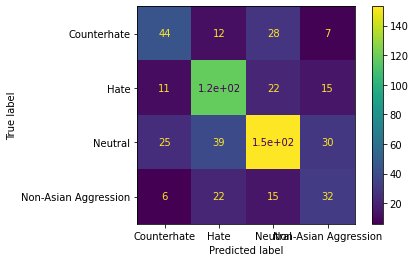

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show() 

# Using RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=30, class_weight='balanced', bootstrap=True, 
                       criterion='entropy', random_state=None,
                       n_jobs=None, oob_score=True,
                       verbose=0, warm_start=False)
# train the model
clf.fit(X_train, y_train)
# use the model to predict the testing instances
predictions = clf.predict(X_test)
# generate the classification report
print(classification_report(y_test, predictions))

                      precision    recall  f1-score   support

         Counterhate       0.48      0.16      0.25        91
                Hate       0.48      0.58      0.52       166
             Neutral       0.57      0.76      0.65       247
Non-Asian Aggression       0.31      0.07      0.11        75

            accuracy                           0.53       579
           macro avg       0.46      0.39      0.38       579
        weighted avg       0.50      0.53      0.48       579



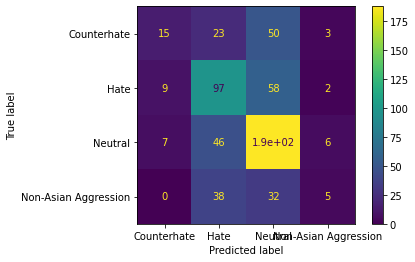

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show() 

# Using LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=1.0, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, max_iter=30,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', verbose=0,
                   warm_start=False)
# train the model
clf.fit(X_train, y_train)
# use the model to predict the testing instances
predictions = clf.predict(X_test)
# generate the classification report
print(classification_report(y_test, predictions))

                      precision    recall  f1-score   support

         Counterhate       0.45      0.42      0.43        91
                Hate       0.61      0.71      0.66       166
             Neutral       0.71      0.62      0.66       247
Non-Asian Aggression       0.39      0.44      0.42        75

            accuracy                           0.59       579
           macro avg       0.54      0.55      0.54       579
        weighted avg       0.60      0.59      0.59       579



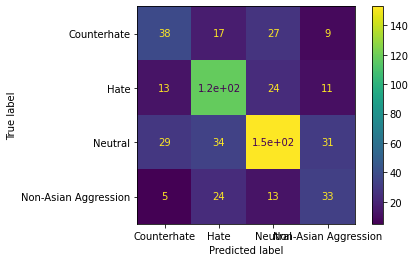

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show() 

# Using MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation='relu', alpha=1.0, 
              batch_size='auto', early_stopping=False,
              hidden_layer_sizes=5, random_state=1,
              learning_rate='adaptive', learning_rate_init=0.1,
              solver='adam', validation_fraction=0.1, verbose=0)
# train the model
clf.fit(X_train, y_train)
# use the model to predict the testing instances
predictions = clf.predict(X_test)
# generate the classification report
print(classification_report(y_test, predictions))

                      precision    recall  f1-score   support

         Counterhate       0.25      0.02      0.04        91
                Hate       0.50      0.79      0.61       166
             Neutral       0.62      0.78      0.69       247
Non-Asian Aggression       0.00      0.00      0.00        75

            accuracy                           0.56       579
           macro avg       0.34      0.40      0.34       579
        weighted avg       0.45      0.56      0.48       579



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


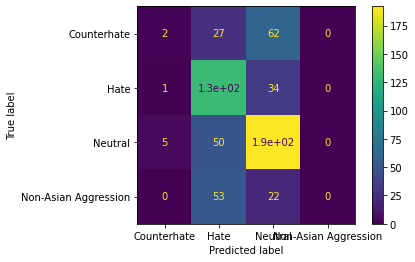

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  